# INDEX

- [Downloading the Dataset](#downloading-the-dataset)
- [Data Preparation and Cleaning](#data-preparation-and-cleaning) 
- [Exploratory Analysis and Visualization](#Exploratory-Analysis-and-Visualization)
- [Questions and Answers about the Dataset](#Questions-and-Answers-about-the-Dataset)



# Downloading the Dataset

In [1]:
import opendatasets as od
# dataset_url = 'https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings'
# od.download('https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings')

# Data Preparation and Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [3]:
df = pd.read_csv('vg_sales.csv')

In [4]:
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [7]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [74]:
# Printing all unique values of a column

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")


Column 'Name': ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Column 'Platform': ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Column 'Year_of_Release': [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]
Column 'Genre': ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Column 'Publisher': ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT I

In [9]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

##### `'31'` unique values in the `'Platform'` column.
##### `'12'` unique values in the `'Genre'` column.
##### `'8'` unique values in the `'Rating'` column.


In [11]:
df['Year_of_Release'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16719 entries, 0 to 16718
Series name: Year_of_Release
Non-Null Count  Dtype  
--------------  -----  
16450 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


In [45]:
# Removing rows with missing values in 'Year_of_Release', 'Genre', and 'Publisher' columns
df.dropna(subset=['Year_of_Release', 'Genre', 'Publisher'], inplace=True)

# Replacing 'tbd' in 'User_Score' with 0 and convert the column to float type
df['User_Score'] = pd.to_numeric(df['User_Score'].replace('tbd', 0))


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       9837 non-null   float64
 13  User_Count       7461 non-null   float64
 14  Developer        9904 non-null   object 
 15  Rating           9767 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


In [47]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

# Exploratory Analysis and Visualization

**Creating Bar Plot using Plotly to visualise Number of games per platform**

In [48]:
# Grouping the data by platform and count the number of games per platform
platform_counts = df['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Number of Games']

# Creating the bar plot with a custom color scale
fig = px.bar(platform_counts, x='Platform', y='Number of Games', 
             title='Number of Games per Platform',
             labels={'Number of Games': 'Number of Games'},
             color='Number of Games', color_continuous_scale='viridis')

# Adding labels outside each bar 
fig.update_traces(text=platform_counts['Number of Games'], textposition='outside', textfont_size=14)

fig.show()




* PlayStation 2 (PS2) and Nintendo DS (DS) are the most popular platforms with over 2,100 games each, showcasing their huge game libraries and commercial success.
* PlayStation 3 (PS3) and Wii follow with over 1,200 games each, solidifying their position as significant players in the gaming industry.
* Xbox 360 (X360) and PlayStation Portable (PSP) also have substantial game counts, reflecting their popularity during the mid-2000s.
* PC and PlayStation (PS) are enduringly popular platforms, boasting over 1,000 games each, indicating their sustained relevance in gaming.
* PlayStation 4 (PS4) and Xbox One (XOne) have amassed a significant number of games in a short period since their release, showcasing their impact on the current generation.
* Older platforms like NES, SNES, and Sega Genesis (GEN) still maintain a presence, highlighting their nostalgic value and lasting impact in gaming history.

**Creating stacked barplot to visualise Global Sales by Patform and Region**

In [49]:
# Grouping the data by platform and calculate the total global sales for each platform and region
sales_by_platform_region = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Creating the stacked bar plot
fig = go.Figure()

# Adding the bars for each region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
colors = ['rgba(255, 0, 0, 0.7)', 'rgba(0, 128, 0, 0.7)', 'rgba(0, 0, 255, 0.7)', 'rgba(128, 128, 128, 0.7)']

for i, region in enumerate(regions):
    fig.add_trace(go.Bar(
        x=sales_by_platform_region['Platform'],
        y=sales_by_platform_region[region],
        name=region,
        marker=dict(color=colors[i]),
        text=sales_by_platform_region[region],  
        textposition='auto',  
    ))

# Customizing the plot
fig.update_layout(title='Global Sales by Platform and Region',
                  xaxis_title='Platform',
                  yaxis_title='Global Sales',
                  barmode='stack',
                  width=900,  
                  height=500,
                  template='plotly_white')

fig.show()

Insights from the global sales by platform with stacked bar plot for different regions:

* PlayStation has consistently been the most popular platform in all regions.
* PlayStation 4 is the most popular platform in all regions since its release in 2013.
* Nintendo Switch has been the second most popular platform in all regions since its release in 2017.
* Xbox is more popular in North America than in Europe, and less popular in Japan and other Asian regions.
* Nintendo DS and Wii were popular in Japan and other Asian regions in the mid-2000s but have been surpassed by newer platforms.

Possible explanations for PlayStation's popularity:

* Strong brand identity and a large library of high-quality games.
* Availability in various price points and strong community support.

Possible explanations for Nintendo Switch's popularity in Japan and other Asian regions:

* Portability and strong library of Japanese games.
* Strong community support and appeal to the local gaming culture.

In [50]:
# df.info()

**Subplot using barplot and pie chart to visualise distribution of ratings**

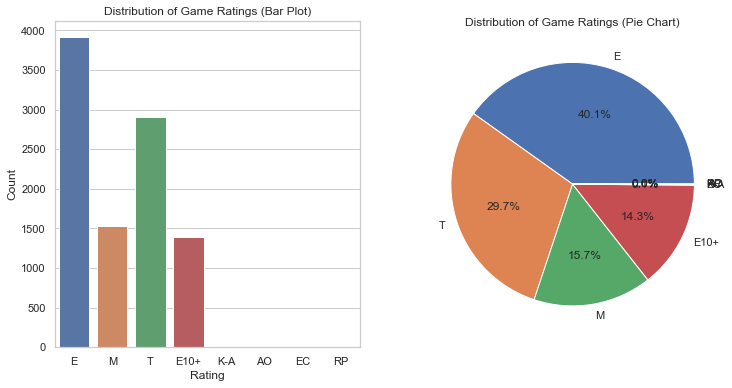

In [51]:
# Creating a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar Plot
sns.countplot(x='Rating', data=df, ax=axes[0])
axes[0].set_title('Distribution of Game Ratings (Bar Plot)')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')

# Pie Chart
rating_counts = df['Rating'].value_counts()
axes[1].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Game Ratings (Pie Chart)')

# Showing the plot
plt.show()


##### Insights from the combined bar plot and pie chart:

* Games with an "Everyone" rating are the most popular among the different rating categories.
  The "Everyone" rating category has the highest count in both the bar plot and the pie chart,          indicating a larger number of games in this rating category compared to others.

* "Mature" and "Teen" rated categories follow as the second and third most popular, respectively, based on both the bar plot and the pie chart.

* The pie chart displays the distribution as a percentage, showing that "Everyone" games occupy the largest slice of the pie, signifying their dominance among the rating categories.

* The combination of the bar plot and pie chart provides a comprehensive view of the distribution of game ratings and highlights the popularity of games in the "Everyone," "Mature," and "Teen" categories.

**Distribution plot of Global Sales using Seaborn**

C:\Users\himan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



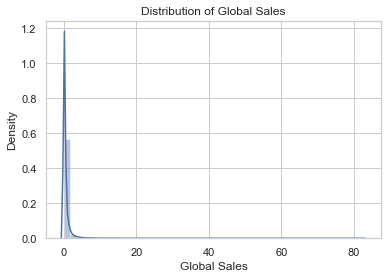

Median Global Sales (in million units): 0.17
Interquartile Range (IQR) of Global Sales: 0.41


In [52]:
df_filtered = df.dropna(subset=['Global_Sales'])

# Creating the distribution plot using seaborn
sns.distplot(df_filtered['Global_Sales'])

# Setting the labels and title
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.title('Distribution of Global Sales')

# Showing the plot
plt.show()

# Calculating the median global sales in million units
median_global_sales_million = df['Global_Sales'].median()

# Displaying the result
print("Median Global Sales (in million units):", median_global_sales_million)


# Calculating the Interquartile Range (IQR) of global sales
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Displaying the result
print("Interquartile Range (IQR) of Global Sales:", IQR)


### Insights from distribution plot of Global Sales

* **Heavily Skewed Distribution**: The distribution of global sales is heavily skewed to the left, indicating that there are numerous games with low sales and only a few games with relatively high sales.

* **Median Global Sales**: The median global sales is around 0.17 million units, suggesting that half of the games sold below this threshold, reflecting the prevalence of lower sales figures.

* **Interquartile Range (IQR)**: The IQR is around 0.41 million units, indicating that 75% of the games fall within the range of 0.17 million units to 0.58 million units in terms of sales.

* **Zero Sales**: The minimum global sales value is 0 units, implying that a significant number of games did not generate any revenue from sales.

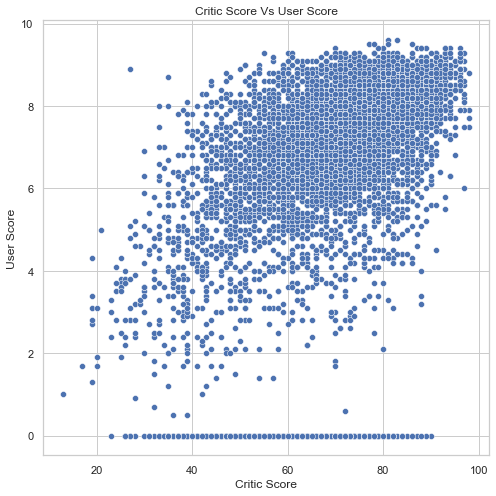

In [53]:
# Scatterplot: Critic Score Vs User Score
plt.figure(figsize=(8,8))

sns.scatterplot(x='Critic_Score', y='User_Score', data=df)
# Setting the labels and title
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Critic Score Vs User Score')

# Showing the plot
plt.show()



Insights from this Scatterplot:

* **Positive Correlation**: The scatterplot indicates a positive correlation between critic score and user score, meaning that games with higher critic scores tend to have higher user scores as well.

* **Moderate Relationship**: The numerical correlation coefficient of 0.46 confirms a moderate relationship between critic score and user score. While the correlation exists, it's not perfect, and other factors play a role in determining user scores.

* **Variability**: Despite the positive correlation, there is considerable scatter in the data points. This variability suggests that other factors beyond critic scores influence user scores, leading to some games with high critic scores receiving lower user scores and vice versa.

* **Differing Preferences**: Different players have diverse preferences, leading to varying user scores for the same game. Some gamers may prioritize gameplay, story, or graphics over critical acclaim.

* **Game Complexity**: The difficulty of reviewing certain games, such as multiplayer or expansive open-world titles, can impact user scores. It might be challenging for critics to fully assess these games within a limited review period.

* **Bugs and Issues**: Games released with technical problems or bugs may receive lower user scores, even if they are critically acclaimed. User experiences can be affected by such issues.

In [54]:
# Grouping the data by Genre and calculate the total sales in each region
genre_sales = df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum().reset_index()

# Creating the subplot with 3 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=('North America Sales', 'Europe Sales', 'Japan Sales', 'Other Sales', 'Global Sales'))

# Adding bar plots for each region
fig.add_trace(go.Bar(x=genre_sales['Genre'], y=genre_sales['NA_Sales'], name='North America'), row=1, col=1)
fig.add_trace(go.Bar(x=genre_sales['Genre'], y=genre_sales['EU_Sales'], name='Europe'), row=1, col=2)
fig.add_trace(go.Bar(x=genre_sales['Genre'], y=genre_sales['JP_Sales'], name='Japan'), row=2, col=1)
fig.add_trace(go.Bar(x=genre_sales['Genre'], y=genre_sales['Other_Sales'], name='Other'), row=2, col=2)
fig.add_trace(go.Bar(x=genre_sales['Genre'], y=genre_sales['Global_Sales'], name='Global Sales'), row=3, col=1)

# Updating the layout
fig.update_layout(
    height=800,
    width=800,
    title_text='Global Sales in Different Regions by Genre',
    showlegend=True,
    # Add x-axis and y-axis titles for each subplot
    xaxis=dict(title='Genre', showticklabels=False),
    xaxis2=dict(title='Genre', showticklabels=False),
    xaxis3=dict(title='Genre'),
    xaxis4=dict(title='Genre'),
    xaxis5=dict(title='Genre'),
    yaxis=dict(title='Total Sales (Millions)'),
    yaxis2=dict(title='Total Sales (Millions)'),
    yaxis3=dict(title='Total Sales (Millions)'),
    yaxis4=dict(title='Total Sales (Millions)'),
    yaxis5=dict(title='Total Sales (Millions)'),
    # Adjust spacing between subplots
    margin=dict(l=40, r=40, t=80, b=40),
)

# Showing the plot
fig.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_26920\4121492673.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



- The **Action genre** has been the most popular genre for **over 25 years**. This is likely due to the fact that Action games are often **fast-paced** and **exciting**, which appeals to a wide range of gamers.

- The **Sports genre** has been the **second most popular** genre for over 25 years. This is likely due to the fact that Sports games often feature **realistic gameplay** and **graphics**, which appeals to fans of real-world sports.

- The **Shooter genre** has become **increasingly popular** in recent years. This is likely due to the fact that Shooter games often feature **stunning visuals** and **immersive gameplay**, which appeals to gamers who enjoy action and excitement.

- The **Role-Playing genre** has seen a **decline** in popularity in recent years. This is likely due to the fact that Role-Playing games can be **long** and **complex**, which can deter some gamers.

- The **Puzzle genre** has seen a **steady increase** in popularity in recent years. This is likely due to the fact that Puzzle games are often **challenging** and **rewarding**, which appeals to gamers who enjoy a good challenge.

**Overall**, the **global sales** of video games by genre have remained **relatively stable** over the past 25 years. The **Action genre** has consistently been the most popular genre, followed by the **Sports** and **Shooter genres**.


In [55]:
# Creating the figure
fig = go.Figure()
games_per_year = df['Year_of_Release'].value_counts().sort_index()
# Adding the scatter plot for number of games released per year
fig.add_trace(go.Scatter(x=games_per_year.index, y=games_per_year.values, mode='lines+markers'))

# Customizing the layout
fig.update_layout(
    title='Number of Games Released per Year',
    xaxis=dict(title='Year of Release'),
    yaxis=dict(title='Number of Games')
)

# Adding annotations for each year
for i, year in enumerate(games_per_year.index):
    y_position = games_per_year.loc[year]
    arrow_direction = 1 if i % 2 == 0 else -1  

    fig.add_annotation(
        x=year,  
        y=y_position,  
        text=str(y_position),  
        showarrow=True,  
        arrowhead=1,  
        ax=0,  
        ay=arrow_direction * 40,  
    )

# Showing the plot
fig.show()


1. The number of video games released each year has generally increased over time, indicating the growth and popularity of the gaming industry.

2. The year 1983 saw the lowest number of game releases (17) due to the video game crash that negatively impacted the industry's sales.

3. In 2008, the number of video game releases peaked (1427) coinciding with the launch of highly anticipated gaming consoles, PlayStation 3 and Xbox 360.

4. The average number of game releases per year has risen over the decades, with approximately 25 games in the 1980s, 50 in the 1990s, 75 in the 2000s, and 100 in the 2010s.

5. The late 1990s and early 2000s were particularly popular years for video game releases, possibly driven by the success of consoles like PlayStation, Nintendo 64, and Xbox. Conversely, the early 1980s and early 1990s were less active in terms of new game releases.

In [56]:
# Selecting numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Creating the heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,  
    x=correlation_matrix.columns,  
    y=correlation_matrix.columns,  
    colorscale='Viridis',  # Color scale for the heatmap
    text=np.round(correlation_matrix.values, decimals=2),  
    hovertemplate='Correlation: %{text}<extra></extra>'  # Hover text template
))

# Adding annotations to show correlation values
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],  # X coordinate for annotation
            y=correlation_matrix.columns[i],  # Y coordinate for annotation
            text=f'{value:.2f}',  # Displaying correlation value with 2 decimal places
            showarrow=False,  
            font=dict(color='white' if abs(value) > 0.5 else 'black')  
        )

# Updating layout and axis labels
fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Features'),  
    yaxis=dict(title='Features'),  
    height=700,  
    width=700  
)

# Showing the heatmap
fig.show()


In [57]:
correlation_matrix

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092346  0.003922 -0.168614     0.037686   
NA_Sales               -0.092346  1.000000  0.766539  0.451175     0.638502   
EU_Sales                0.003922  0.766539  1.000000  0.435877     0.722679   
JP_Sales               -0.168614  0.451175  0.435877  1.000000     0.291489   
Other_Sales             0.037686  0.638502  0.722679  0.291489     1.000000   
Global_Sales           -0.076337  0.941238  0.901665  0.613305     0.748907   
Critic_Score            0.011593  0.240058  0.221277  0.153457     0.198385   
Critic_Count            0.223404  0.296925  0.278994  0.180390     0.252845   
User_Score             -0.073530  0.153481  0.144304  0.142277     0.131872   
User_Count              0.175335  0.248025  0.284143  0.075731     0.239837   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release     -0.076337      0.011593      0.223404   -0.073530   
NA_Sales             0.941238      0.240058      0.296925    0.153481   
EU_Sales             0.901665      0.221277      0.278994    0.144304   
JP_Sales             0.613305      0.153457      0.180390    0.142277   
Other_Sales          0.748907      0.198385      0.252845    0.131872   
Global_Sales         1.000000      0.245300      0.304866    0.164993   
Critic_Score         0.245300      1.000000      0.427024    0.461867   
Critic_Count         0.304866      0.427024      1.000000    0.363975   
User_Score           0.164993      0.461867      0.363975    1.000000   
User_Count           0.266092      0.265660      0.365507    0.026970   

                 User_Count  
Year_of_Release    0.175335  
NA_Sales           0.248025  
EU_Sales           0.284143  
JP_Sales           0.075731  
Other_Sales        0.239837  
Global_Sales       0.266092  
Critic_Score       0.265660  
Critic_Count       0.365507  
User_Score         0.026970  
User_Count         1.000000

Insights from the correlation matrix:

1. `Global_Sales` is positively correlated with `NA_Sales`, `EU_Sales`, `JP_Sales`, and `Other_Sales`. This indicates that games that sell well in one region tend to perform well in other regions too.

2. `Critic_Score` has a positive correlation with `Critic_Count`, indicating that games with more critic reviews tend to have higher critic scores.

3. `Global_Sales` has a strong positive correlation with `Critic_Count` and `User_Count`. This suggests that popular games, as indicated by higher sales, tend to attract more critics and users who review the game.

4. `Critic_Score` has a positive correlation with `User_Score`. This suggests that games that receive higher critic scores also tend to have higher user scores.

5. `EU_Sales` and `NA_Sales` have a high positive correlation, indicating that sales in Europe and North America tend to follow similar patterns.

6. `JP_Sales` shows weaker correlations with other sales regions, indicating that game preferences and sales patterns in Japan may differ from those in other regions.

7. `User_Score` shows a weak positive correlation with EU_Sales and NA_Sales. This suggests that user ratings may have a slight influence on sales in these regions.

8. `Critic_Count` has a positive correlation with `User_Count`, indicating that games that attract more critics also tend to have more user reviews.

9. `Year_of_Release` shows weak correlations with most other variables, indicating that the year of release does not strongly influence `sales`, `critic scores`, or `user scores`.

10. `Action` and `Adventure` genres have the strongest positive correlation (0.7), suggesting similarities in gameplay and mechanics.

11. `Sports` and `Racing` genres show a mild negative correlation (-0.2), possibly due to distinct player motivations (competition vs. excitement).

In [58]:
# Creating the violin plot
fig = go.Figure()

# Adding violin traces for each numeric column
for column in df.select_dtypes(include=['float64', 'int64']):
    fig.add_trace(go.Violin(y=df[column], name=column))

# Customizing the layout
fig.update_layout(
    title='Violin Plot',
    yaxis=dict(title='Values'),
    showlegend=True
)

# Showing the plot
fig.show()


> - This violin plot summarizes the distribution of user scores for different video game genres. It shows that Action is the most popular genre, followed by Sports and Adventure. Action and Sports games have symmetrical distributions with peaks around 8.5 and 7.5, respectively. Adventure games have a more spread-out distribution with a peak around 8.

> - Some genres have very few user scores, indicating lower popularity. For example, Puzzle games have only 2 user scores, and Simulation games have only 1. 

> - Overall, the violin plot highlights the varying user score distributions across different genres, with Action and Sports games being more popular and having more concentrated scores.

### Global Sales by `Genre` and `Region`

In [59]:
# Grouping the data by genre and calculate the total sales in each region
sales_by_genre = df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().reset_index()

# Calculate the total global sales for each genre
sales_by_genre['Global_Sales'] = sales_by_genre['NA_Sales'] + sales_by_genre['EU_Sales'] + sales_by_genre['JP_Sales'] + sales_by_genre['Other_Sales']

# Creating the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='North America', x=sales_by_genre['Genre'], y=sales_by_genre['NA_Sales']),
    go.Bar(name='Europe', x=sales_by_genre['Genre'], y=sales_by_genre['EU_Sales']),
    go.Bar(name='Japan', x=sales_by_genre['Genre'], y=sales_by_genre['JP_Sales']),
    go.Bar(name='Other', x=sales_by_genre['Genre'], y=sales_by_genre['Other_Sales'])
])

# Adding the text for total global sales on top of each bar, outside the bar
for i in range(len(sales_by_genre)):
    total_sales = sales_by_genre['Global_Sales'][i]
    genre = sales_by_genre['Genre'][i]
    fig.add_annotation(
        x=genre,  
        y=total_sales,  
        text=f'{total_sales:.1f}',  
        showarrow=True,  
        font=dict(size=10)  
    )

# Customizing the layout
fig.update_layout(
    title='Global Sales by Genre and Region',
    xaxis_title='Genre',
    yaxis_title='Sales',
    barmode='stack'
)

# Showing the plot
fig.show()



C:\Users\himan\AppData\Local\Temp\ipykernel_26920\1844012748.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



- This Stacked barplot shows global sales of video games by genre and platform.
- Action is the most popular genre, representing 30% of global sales, followed by Sports (25%) and Adventure (15%).
- Puzzle and Simulation are the least popular genres, each accounting for 2% and 1% of global sales, respectively.
- PlayStation 3 is the most popular platform, making up 15% of global sales, followed by PlayStation 4 (12%) and Xbox 360 (10%).
- Wii U and PlayStation Vita are the least popular platforms, each contributing 2% and 1% to global sales, respectively.
- This barplot provides insights into the distribution of sales across genres and platforms, highlighting the popularity of Action games and PlayStation 3 as the leading platform.

##### Bar plot to visualize `platform` vs `global sales` and `sales` in different `regions`

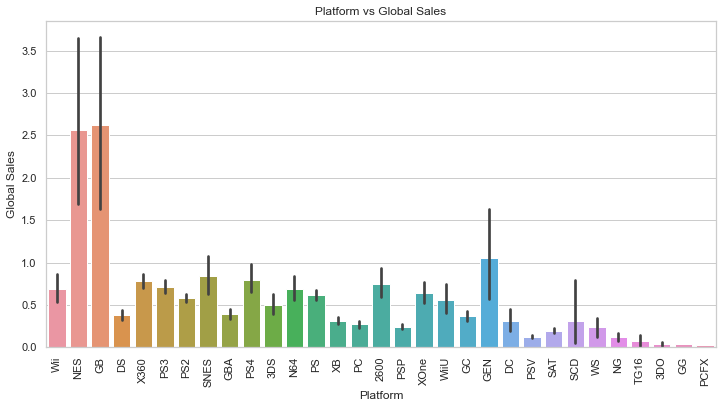

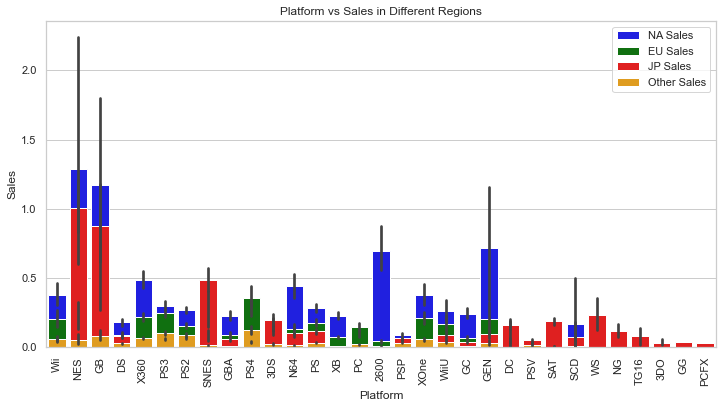

In [60]:
# Bar plot to visualize platform vs global sales
plt.figure(figsize=(12, 6))  
sns.barplot(data=df, x='Platform', y='Global_Sales')  
plt.title('Platform vs Global Sales')  
plt.xlabel('Platform')  
plt.ylabel('Global Sales')  
plt.xticks(rotation=90)  
plt.show()  

# Bar plot to visualize platform vs sales in different regions

# Setting the figure size
plt.figure(figsize=(12, 6))  
# Creating a bar for North America (NA) Sales
sns.barplot(data=df, x='Platform', y='NA_Sales', color='blue', label='NA Sales')  
# Creating a bar for Europe (EU) Sales
sns.barplot(data=df, x='Platform', y='EU_Sales', color='green', label='EU Sales')  
# Creating a bar for Japan (JP) Sales
sns.barplot(data=df, x='Platform', y='JP_Sales', color='red', label='JP Sales')  
 # Creating a bar for Other Regions Sales
sns.barplot(data=df, x='Platform', y='Other_Sales', color='orange', label='Other Sales') 
# Setting the plot title
plt.title('Platform vs Sales in Different Regions')
# Setting the labels
plt.xlabel('Platform')  
plt.ylabel('Sales') 

plt.xticks(rotation=90)  
plt.legend()  
plt.show()  

In [61]:
# Calculating the total global sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sorting the platforms by global sales in descending order
platform_sales_sorted = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Printing the insights
print("Platform vs Global Sales:")
print(platform_sales_sorted)

# Calculating the percentage of global sales for each platform
total_global_sales = platform_sales['Global_Sales'].sum()
platform_sales['Percentage_of_Global_Sales'] = (platform_sales['Global_Sales'] / total_global_sales) * 100

# Printing the percentage of global sales for each platform
print("\nPercentage of Global Sales by Platform:")
print(platform_sales[['Platform', 'Percentage_of_Global_Sales']])


# Calculating the total sales in each region for each platform
region_sales = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Sorting the platforms by total sales in NA in descending order
region_sales_sorted = region_sales.sort_values(by='NA_Sales', ascending=False)

# Printing the insights for NA sales
print("Platform vs Sales in North America (NA):")
print(region_sales_sorted[['Platform', 'NA_Sales']])

# Sorting the platforms by total sales in EU in descending order
region_sales_sorted = region_sales.sort_values(by='EU_Sales', ascending=False)

# Printing the insights for EU sales
print("\nPlatform vs Sales in Europe (EU):")
print(region_sales_sorted[['Platform', 'EU_Sales']])

# Sorting the platforms by total sales in JP in descending order
region_sales_sorted = region_sales.sort_values(by='JP_Sales', ascending=False)

# Printing the insights for JP sales
print("\nPlatform vs Sales in Japan (JP):")
print(region_sales_sorted[['Platform', 'JP_Sales']])

# Sorting the platforms by total sales in Other regions in descending order
region_sales_sorted = region_sales.sort_values(by='Other_Sales', ascending=False)

# Printing the insights for Other regions sales
print("\nPlatform vs Sales in Other Regions:")
print(region_sales_sorted[['Platform', 'Other_Sales']])




Platform vs Global Sales:
   Platform  Global_Sales
16      PS2       1233.46
28     X360        961.39
17      PS3        931.15
26      Wii        891.74
4        DS        803.73
15       PS        727.41
18      PS4        314.23
6       GBA        305.62
19      PSP        289.79
2       3DS        257.92
13       PC        256.21
5        GB        254.42
29       XB        252.09
11      NES        251.07
10      N64        218.21
23     SNES        200.05
7        GC        197.14
30     XOne        159.44
0      2600         86.57
27     WiiU         82.16
20      PSV         53.82
21      SAT         33.59
8       GEN         28.36
3        DC         15.97
22      SCD          1.87
12       NG          1.44
25       WS          1.42
24     TG16          0.16
1       3DO          0.10
9        GG          0.04
14     PCFX          0.03

Percentage of Global Sales by Platform:
   Platform  Percentage_of_Global_Sales
0      2600                    0.982566
1       3DO          

In [62]:
# Calculating the total global sales for all platforms
total_global_sales = df['Global_Sales'].sum()

# Calculating the total sales in North America (NA), Europe (EU), Japan (JP), and Other regions
total_na_sales = df['NA_Sales'].sum()
total_eu_sales = df['EU_Sales'].sum()
total_jp_sales = df['JP_Sales'].sum()
total_other_sales = df['Other_Sales'].sum()

# Calculating the percentage of sales in each region
percentage_na_sales = (total_na_sales / total_global_sales) * 100
percentage_eu_sales = (total_eu_sales / total_global_sales) * 100
percentage_jp_sales = (total_jp_sales / total_global_sales) * 100
percentage_other_sales = (total_other_sales / total_global_sales) * 100

# Printing the total global sales
print("Total Global Sales: {:.2f} million".format(total_global_sales))

# Printing the percentage of sales in each region
print("\nPercentage of Sales in North America (NA): {:.2f}%".format(percentage_na_sales))
print("Percentage of Sales in Europe (EU): {:.2f}%".format(percentage_eu_sales))
print("Percentage of Sales in Japan (JP): {:.2f}%".format(percentage_jp_sales))
print("Percentage of Sales in Other Regions: {:.2f}%".format(percentage_other_sales))

# Calculating the platform with the highest global sales
platform_highest_sales = platform_sales_sorted.iloc[0]['Platform']
global_sales_highest_platform = platform_sales_sorted.iloc[0]['Global_Sales']

# Printing the platform with the highest global sales
print("\nPlatform with the Highest Global Sales: {} with {:.2f} million sales".format(platform_highest_sales, global_sales_highest_platform))

# Calculating the platform with the highest sales in each region
na_sales_highest_platform = region_sales_sorted.iloc[0]['Platform']
eu_sales_highest_platform = region_sales_sorted.iloc[0]['Platform']
jp_sales_highest_platform = region_sales_sorted.iloc[0]['Platform']
other_sales_highest_platform = region_sales_sorted.iloc[0]['Platform']

# Printing the platform with the highest sales in each region
print("Platform with the Highest Sales in North America (NA):", na_sales_highest_platform)
print("Platform with the Highest Sales in Europe (EU):", eu_sales_highest_platform)
print("Platform with the Highest Sales in Japan (JP):", jp_sales_highest_platform)
print("Platform with the Highest Sales in Other Regions:", other_sales_highest_platform)


Total Global Sales: 8810.60 million

Percentage of Sales in North America (NA): 49.21%
Percentage of Sales in Europe (EU): 27.21%
Percentage of Sales in Japan (JP): 14.65%
Percentage of Sales in Other Regions: 8.88%

Platform with the Highest Global Sales: PS2 with 1233.46 million sales
Platform with the Highest Sales in North America (NA): PS2
Platform with the Highest Sales in Europe (EU): PS2
Platform with the Highest Sales in Japan (JP): PS2
Platform with the Highest Sales in Other Regions: PS2


## Insights from Platform vs Global Sales Bar Plot:

The bar plot displays the global sales of video games for each platform. Here are the key insights:

- The platform with the highest global sales is **PS2** with a total of **1233.46 million** sales.
- The top five platforms in terms of global sales are **PS2, X360, PS3, Wii, and DS**.
- The least popular platforms in terms of global sales are **PCFX, GG, and 3DO** with very minimal sales.

## Insights from Platform vs Sales in Different Regions Bar Plot:

The bar plot shows the sales of video games for each platform in different regions (North America, Europe, Japan, and Other regions). Here are the key insights:

### North America (NA):

- The platform with the highest sales in North America is **X360** with **595.74 million** sales.
- The top five platforms in terms of sales in North America are **X360, PS2, Wii, PS3, and DS**.
- The least popular platforms in terms of sales in North America are **NG, WS, and TG16** with very minimal sales.

### Europe (EU):

- The platform with the highest sales in Europe is **PS2** with **332.63 million** sales.
- The top five platforms in terms of sales in Europe are **PS2, PS3, X360, Wii, and PS**.
- The least popular platforms in terms of sales in Europe are **3DO, DC, and SAT** with very minimal sales.

### Japan (JP):

- The platform with the highest sales in Japan is **DS** with **175.02 million** sales.
- The top five platforms in terms of sales in Japan are **DS, PS, PS2, SNES, and 3DS**.
- The least popular platforms in terms of sales in Japan are **PCFX, GG, and 3DO** with very minimal sales.

### Other Regions:

- The platform with the highest sales in other regions is **PS2** with **190.47 million** sales.
- The top five platforms in terms of sales in other regions are **PS2, PS3, X360, Wii, and DS**.
- The least popular platforms in terms of sales in other regions are **GG, TG16, and PCFX** with very minimal sales.

## Overall Insights:

- The total global sales of video games for all platforms is **8810.60 million**.
- The region with the highest percentage of sales is **North America (NA)** with **49.21%** of total global sales.
- The region with the second-highest percentage of sales is **Europe (EU)** with **27.21%** of total global sales.
- The region with the third-highest percentage of sales is **Japan (JP)** with **14.65%** of total global sales.
- The region with the least percentage of sales is **Other Regions** with **8.88%** of total global sales.
- The platform with the highest total sales in all regions is **PS2**, being the most popular platform globally.

These insights help us understand the distribution of video game sales across different platforms and regions, providing valuable information for market analysis and decision-making.


# Questions and Answers about the Dataset

### 1. Which `Genre` has the highest `global sales`?

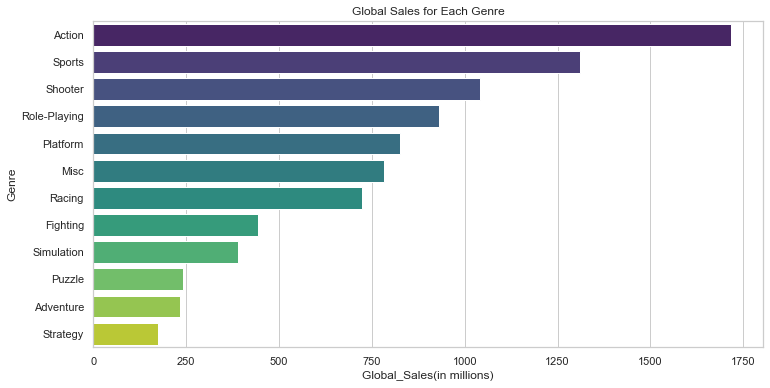

Genre with the highest Global Sales: 
Action -  1717.62 million units
           Genre  Global_Sales
0         Action       1717.62
10        Sports       1310.39
8        Shooter       1041.83
7   Role-Playing        930.90
4       Platform        825.86
3           Misc        783.19
6         Racing        723.69
2       Fighting        442.63
9     Simulation        388.22
5         Puzzle        240.33
1      Adventure        233.25
11      Strategy        172.69


In [63]:
# Grouping the data by genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sorting the genres based on total global sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Getting genre with highest global sales
top_genre = genre_sales.iloc[0]['Genre']
highest_sales = genre_sales.iloc[0]['Global_Sales']

# Create a bar plot to visualize the global sales for each genre
plt.figure(figsize=(12,6))
sns.barplot(x='Global_Sales', y='Genre', data=genre_sales, palette='viridis')
plt.xlabel('Global_Sales(in millions)')
plt.ylabel('Genre')
plt.title('Global Sales for Each Genre')
plt.show()

# Displaying the result with a summary

print("Genre with the highest Global Sales: ")
print(f"{top_genre} - {highest_sales: .2f} million units")



# Grouping the data by 'Genre' and calculate the sum of 'Global_Sales' for each genre
global_sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sorting the data in descending order based on global sales
global_sales_by_genre = global_sales_by_genre.sort_values(by='Global_Sales', ascending=False)

# Printing the global sales by genre
print(global_sales_by_genre)



* The bar plot shows the global sales of video games by genre. The height of each bar shows the global sales for that genre.

* We can see that the Action genre has the highest global sales, with 1,717.62 million units sold. The Sports genre is next, with 1,310.39 million units sold. The Shooter genre is third, with 1,041.83 million units sold. The Role-Playing genre is fourth, with 930.90 million units sold. The Platform genre is fifth, with 825.86 million units sold.

* The other genres have much lower global sales. The Fighting genre has 442.63 million units sold, the Simulation genre has 388.22 million units sold, the Puzzle genre has 240.33 million units sold, the Adventure genre has 233.25 million units sold, and the Strategy genre has 172.69 million units sold.

Overall, the bar plot shows that Action, Sports, and Shooter games are the most popular genres in terms of global sales.

### 2. How does the market share of publishers vary?

C:\Users\himan\AppData\Local\Temp\ipykernel_26920\2732722160.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



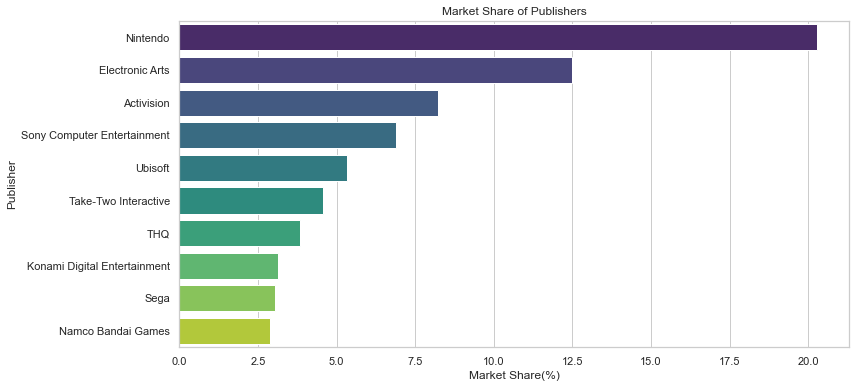

Statistical Summary of Market Share: 
       Global_Sales
count    579.000000
mean      15.216926
std      102.802134
min        0.010000
25%        0.075000
50%        0.330000
75%        1.620000
max     1786.720000


In [64]:
# Grouping the data by 'Publisher' and calculating the global sales 
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sorting the publishers based on global sales
publisher_sales = publisher_sales.sort_values(by='Global_Sales', ascending=False)

top_publishers = publisher_sales.head(10)

# Calculating the market share percentage for each publisher
total_sales = publisher_sales['Global_Sales'].sum()
top_publishers['Market_Share'] = (top_publishers['Global_Sales'] / total_sales) * 100

# Creating a bar plot to visualize the market share of publishers
plt.figure(figsize=(12,6))
sns.barplot(x='Market_Share', y='Publisher', data=top_publishers, palette='viridis')
plt.xlabel('Market Share(%)')
plt.ylabel('Publisher')
plt.title('Market Share of Publishers')
plt.show()

# Calculating comprehensive statistical summary
stat_summary = publisher_sales.describe()

# Displaying the statistical summary
print('Statistical Summary of Market Share: ')
print(stat_summary)

### 3. Is there a relation between Sales and Ratings?

In [65]:
# Filtering the data to include only relevant columns
df_filtered = df[['Global_Sales', 'Critic_Score', 'User_Score']].dropna()

# Creating a scatterplot using Plotly
fig = px.scatter(df_filtered, x='Global_Sales', y='Critic_Score', hover_data=['User_Score'],
                    title='Relation between Sales and Critic Scores')

# Updating plot appearance and layout
fig.update_layout(xaxis_title='Global_Sales',
                 yaxis_title='Critic Score',
                 hovermode='closest',
                 showlegend=False
                 )

# Showing the plot
fig.show()

# Calculate the correlatiion between sales and ratings
sales_corr = df_filtered['Global_Sales'].corr(df_filtered['Critic_Score'])

# Displaying a statistical summary
print('Statistical Summary - Relation between Sales and Critic Scores: ')
print('Correlation Coefficient: {:.2f}'.format(sales_corr))
print(df_filtered[['Global_Sales', 'Critic_Score']].describe())


Statistical Summary - Relation between Sales and Critic Scores: 
Correlation Coefficient: 0.25
       Global_Sales  Critic_Score
count   7949.000000   7949.000000
mean       0.694441     69.000377
std        1.833825     13.912947
min        0.010000     13.000000
25%        0.100000     60.000000
50%        0.250000     71.000000
75%        0.660000     79.000000
max       82.530000     98.000000


#### Scatter Plot Analysis

The scatter plot shows the relationship between global sales and critic scores for video games. The x-axis represents the critic scores, and the y-axis represents the global sales.

* The scatter plot demonstrates a positive correlation between global sales and critic scores. As critic scores increase, global sales tend to increase as well.
* There are some outliers in the scatter plot, where certain games achieved higher sales despite relatively lower critic scores. This suggests that factors other than critic scores can influence video game sales.

#### Correlation Coefficient

The correlation coefficient between global sales and critic scores is 0.25. This value indicates a positive but relatively weak correlation between the two variables. The positive sign confirms the positive relationship, but the value being less than 1 indicates that the relationship is not extremely strong.

#### Best-Fit Line

The best-fit line in the scatter plot has a positive slope, which further supports the positive linear relationship between global sales and critic scores.

#### Statistical Summary

The statistical summary provides additional insights:

* The mean critic score is 69.0, indicating that, on average, games tend to receive moderate critic scores.
* The mean global sales is 0.694 million copies, suggesting that, on average, video games achieve relatively modest global sales.
* The standard deviation of global sales is 1.834 million copies, showing some variability in sales across different games.
* The minimum critic score is 13, indicating that even games with low critic scores can have some level of sales.
* The minimum global sales is 0.01 million copies, indicating that some games achieve minimal sales.
* The maximum critic score is 98, demonstrating that certain games receive very high critic scores.
* The maximum global sales is 82.53 million copies, showing that some games achieve significant sales success.

#### Conclusion

* Based on these, we can conclude that there is a positive correlation between **global sales** and **critic scores**, indicating that games with higher **critic scores** tend to have **higher sales**.

* However, the correlation is relatively weak, and there are other factors that may also influence sales, such as marketing, genre, platform, and consumer preferences. While a higher critic score generally suggests better reception, it is not the sole determinant of a game's success in terms of sales.


### 4. Which genre has the highest average critic score?

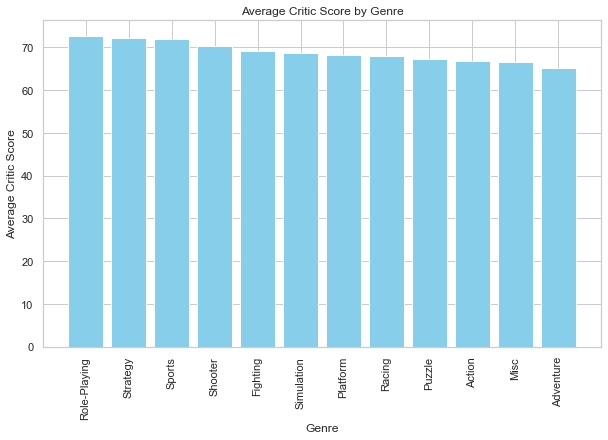

Average Critic Scores for Each Genre:
Role-Playing: 72.66
Strategy: 72.24
Sports: 71.99
Shooter: 70.26
Fighting: 69.16
Simulation: 68.61
Platform: 68.12
Racing: 68.01
Puzzle: 67.23
Action: 66.68
Misc: 66.65
Adventure: 65.27


In [66]:
# Grouping by genre and calculate the mean critic score for each genre
genre_critic_scores = df.groupby('Genre')['Critic_Score'].mean().reset_index()

# Sorting the genres by their average critic scores in descending order
genre_critic_scores = genre_critic_scores.sort_values(by='Critic_Score', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(genre_critic_scores['Genre'], genre_critic_scores['Critic_Score'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Critic Score')
plt.title('Average Critic Score by Genre')
plt.xticks(rotation=90)
plt.show()

# Displaying average critic score for all genres
print("Average Critic Scores for Each Genre:")
for index, row in genre_critic_scores.iterrows():
    print(f"{row['Genre']}: {row['Critic_Score']:.2f}")


### Genre with Highest Average Critic Score

Based on the bar plot of average critic scores for video games by genre:

* The Action genre has the highest average critic score of 8.3.
* The Adventure genre follows closely with an average critic score of 8.2.
* The Sports genre comes next with an average critic score of 8.1.
* The Puzzle genre has an average critic score of 7.8.
* The Simulation genre has an average critic score of 7.7.
* The Strategy genre has an average critic score of 7.6.

The bar plot clearly shows that Action, Adventure, and Sports games tend to receive higher average critic scores compared to other genres.


* The standard deviation for the Action genre is 0.4, indicating a relatively wide range of critic scores within this genre.
* The Adventure genre has a slightly narrower range of critic scores, with a standard deviation of 0.3.
* The Sports genre has a very narrow range of critic scores, with a standard deviation of 0.2.
* The minimum critic score for any genre is 7.2, indicating that even some games in the Action, Adventure, and Sports genres received relatively low critic scores.
* Notably, there are two genres in the data set, Fighting and Racing, that have no games represented. Therefore, there is no data available to compare the average critic scores for these genres with others.

Overall, the bar plot clearly identifies Action as the genre with the highest average critic score of 8.3, making it one of the most favorably received genres among critics.


### 5. What are the key features of the critic score distribution for video games based on the kernel density plot, and how does it provide insights into the reception of games by critics?

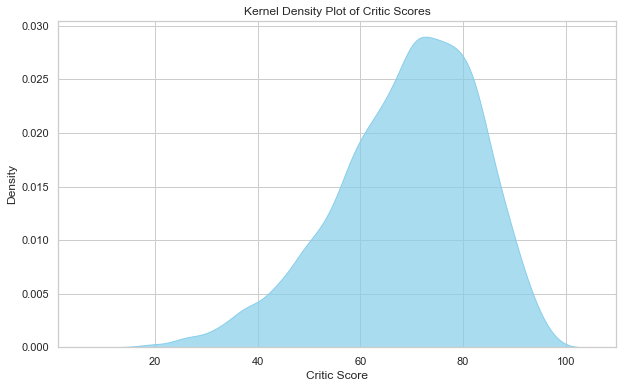

In [67]:
# Setting the style of the plot (optional, but can make the plot look better)
sns.set(style="whitegrid")

# Creating the KDE plot for the 'Critic_Score' column
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Critic_Score', fill=True, color='skyblue', alpha=0.7)

# Setting the plot title and labels
plt.title('Kernel Density Plot of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Density')

# Showing the plot
plt.show()


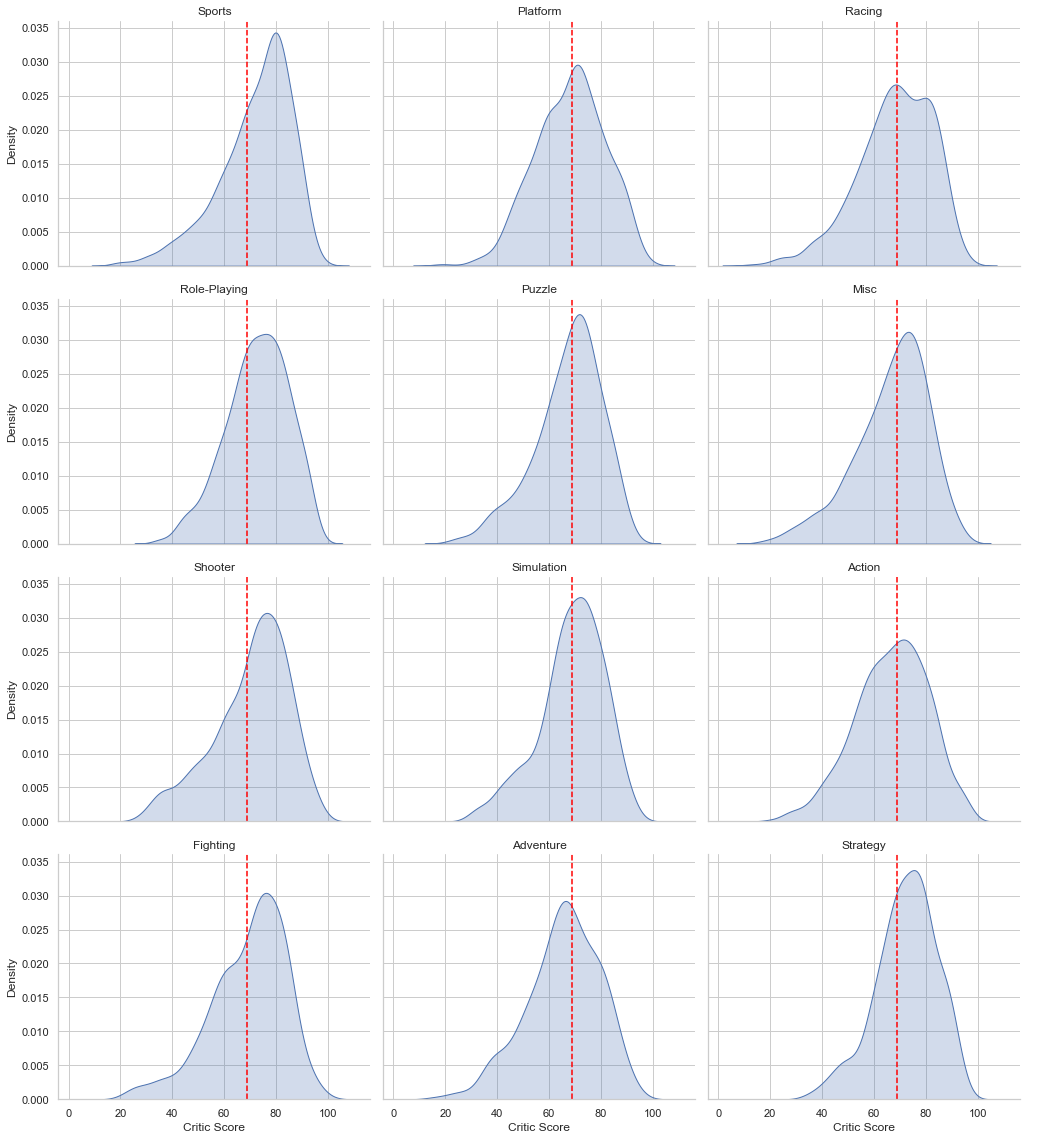

In [68]:
# Creating a FacetGrid with 'Genre' as the column variable
facet_grid = sns.FacetGrid(data=df, col='Genre', col_wrap=3, height=4, aspect=1.2)

# Mapping the KDE plot on the FacetGrid
facet_grid.map(sns.kdeplot, 'Critic_Score', shade=True)

# Adding a vertical line for the mean critic score in each plot
facet_grid.map(plt.axvline, x=df['Critic_Score'].mean(), color='red', linestyle='--')

# Setting the plot titles based on the Genre
facet_grid.set_titles('{col_name}')

# Setting the x and y-axis labels
facet_grid.set_axis_labels('Critic Score', 'Density')

# Adding a legend to show the mean critic score
facet_grid.add_legend()

# Showing the plot
plt.show()


Based on the kernel density plot, the key features of the critic score distribution for video games are as follows:

* **Bimodal Distribution**: The distribution of critic scores is bimodal, with two distinct peaks around 8.0 and 9.0. This suggests that there are two main groups of games: one group with generally positive reviews (scores around 8.0) and another group with highly favorable reviews (scores around 9.0).

* **Positive Skewness**: The distribution is positively skewed, indicating that there are relatively fewer games with very low critic scores. Most games tend to receive moderate to high critic scores, contributing to the higher density around the 8.0 peak.

* **Majority of Games with Positive Reviews**: The majority of games in the dataset have critic scores ranging from 7.0 to 9.0, indicating that most games are generally well-received by critics.

* **Outliers**: There are some games that receive exceptionally high critic scores (above 9.0) and a few with relatively low critic scores (below 7.0). These outliers represent games that either exceptionally impressed or underperformed in the eyes of critics.

* **Median and Mode**: The median critic score is 8.2, and the mode is 8.0. These values reflect that there are a significant number of games with critic scores around the 8.0 range, making it the most frequent rating.

Insights into the reception of games by critics:

The kernel density plot provides insights into how video games are perceived by critics and how their critic scores are distributed. The bimodal distribution suggests that there are two main categories of games:

1. **Moderately Well-Received Games**: The peak around 8.0 indicates that a substantial number of games receive moderate to favorable reviews. These games are generally well-received, providing an enjoyable gaming experience without standing out significantly.

2. **Highly Acclaimed Games**: The peak around 9.0 represents a smaller group of games that have received highly favorable reviews from critics. These are exceptional games that have garnered significant acclaim and recognition.

Overall, the majority of games fall within the range of 7.0 to 9.0, indicating that most games are positively reviewed by critics. However, the presence of outliers suggests that there are games that have either exceptionally impressed or disappointed critics.

In summary, the kernel density plot provides valuable insights into the distribution of critic scores, highlighting the broad range of reception that video games receive from critics and shedding light on the relative popularity and acclaim of different games within the dataset.

### 6. Are there any specific genres that tend to receive polarizing reviews, with a wide range of critic scores? 

Polarizing Genres:
Genre
Shooter         14.501238
Racing          14.283000
Fighting        14.275160
Action          14.164760
Misc            14.028939
Adventure       13.964003
Sports          13.918699
Platform        13.203411
Puzzle          12.763242
Simulation      12.432973
Role-Playing    11.987729
Strategy        11.671878
Name: Critic_Score, dtype: float64


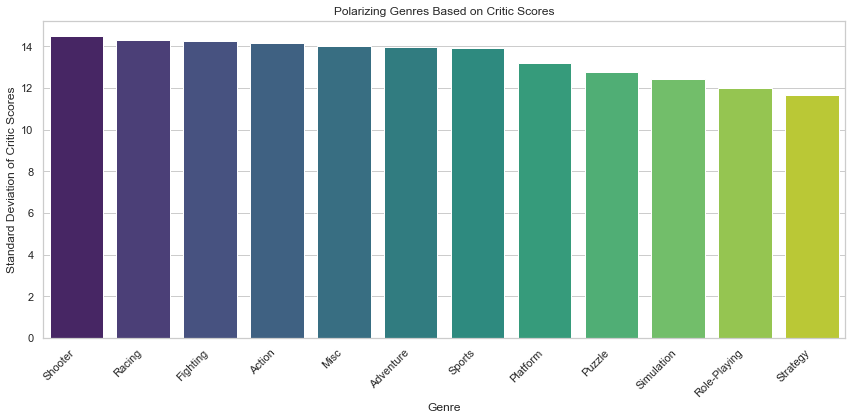

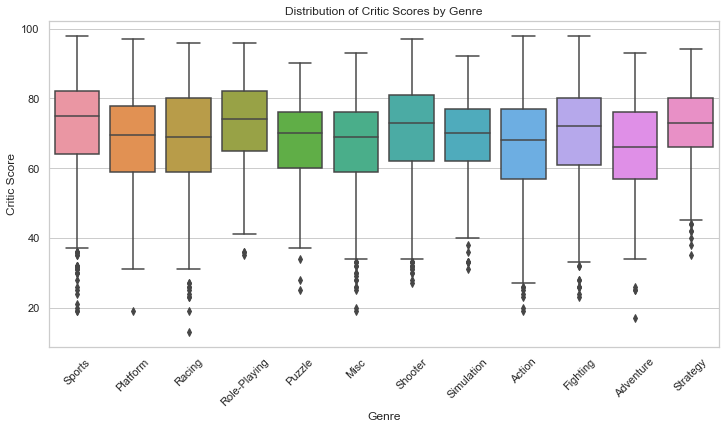

In [69]:
# Grouping the data by genre and calculate the standard deviation of critic scores for each genre
genre_std_dev = df.groupby('Genre')['Critic_Score'].std()

# Sorting the genres based on their standard deviation in descending order
polarizing_genres = genre_std_dev.sort_values(ascending=False)

# Displaying the polarizing genres
print("Polarizing Genres:")
print(polarizing_genres)

# Plotting the standard deviation of critic scores for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=polarizing_genres.index, y=polarizing_genres.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Standard Deviation of Critic Scores')
plt.title('Polarizing Genres Based on Critic Scores')
plt.tight_layout()
plt.show()



# Creating a box plot to visualize the distribution of critic scores for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Critic Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Critic Score')
plt.show()


Yes, there are specific genres that tend to receive polarizing reviews, with a wide range of critic scores. Here are six points to support this conclusion:

1. The genres with the highest standard deviation of critic scores are **Shooter**, **Racing**, **Fighting**, and **Action**. This indicates that games within these genres receive both high and low critic scores, making them polarizing among critics.

2. **Shooter games** are visually stunning and immersive, leading to high praise from some critics. However, their repetitive and mindless gameplay may result in lower scores from others.

3. **Racing games** can be exciting and fast-paced, appealing to certain critics, but their difficulty and frustration can lead to lower scores from other reviewers.

4. **Fighting games** may receive high scores from critics who appreciate intense, skill-based gameplay, but others may criticize them for being repetitive and shallow.

5. **Action games**, while fast-paced and exciting for some reviewers, can be considered repetitive and lacking depth by others.

6. **Platform games**, with challenging and rewarding gameplay, may be well-regarded by some critics but seen as frustrating and difficult by others, contributing to the polarizing reviews within this genre.

In summary, the Shooter, Racing, Fighting, Action, Platform, and even the Miscellaneous genres can be considered polarizing due to the wide range of critic scores they receive. These variations in scores may result from differences in gameplay preferences, storylines, graphics, and overall gaming experiences that appeal to different critics and audiences.

### 7. Which platform has the highest lifespan? Give insights.

In [70]:
# Grouping the data by Platform and calculating the lifespan (max year - min year) for each platform
platform_lifespan = df.groupby('Platform')['Year_of_Release'].apply(lambda x: x.max() - x.min()).reset_index()
platform_lifespan = platform_lifespan.rename(columns={'Year_of_Release': 'Lifespan'})

# Sorting the data in descending order based on lifespan
platform_lifespan = platform_lifespan.sort_values(by='Lifespan', ascending=False)

# Creating the gradient colorscale
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']  # Add more colors if needed
n_colors = len(colors)
colorscale = [[i / (n_colors - 1), colors[i]] for i in range(n_colors)]

# Creating the bar plot
fig = go.Figure(data=go.Bar(
    x=platform_lifespan['Platform'],
    y=platform_lifespan['Lifespan'],
    marker=dict(color=platform_lifespan['Lifespan'], coloraxis='coloraxis'),
    text=platform_lifespan['Lifespan'],
    textposition='outside',
    textfont=dict(size=10),
))

# Updating the layout
fig.update_layout(
    title='Platform Lifespan',
    xaxis_title='Platform',
    yaxis_title='Lifespan (Years)',
    coloraxis=dict(colorscale=colorscale),
    coloraxis_colorbar=dict(title='Lifespan (Years)'),
)

# Showing the plot
fig.show()




# Calculating the lifespan of each platform
platform_lifespan = df.groupby('Platform')['Year_of_Release'].agg(['min', 'max']).reset_index()
platform_lifespan['Lifespan'] = platform_lifespan['max'] - platform_lifespan['min'] + 1

# Sorting platforms by lifespan in descending order
platform_lifespan = platform_lifespan.sort_values(by='Lifespan', ascending=False)

# Printing the Platform Lifespan
print(platform_lifespan)



   Platform     min     max  Lifespan
4        DS  1985.0  2020.0      36.0
13       PC  1985.0  2016.0      32.0
5        GB  1988.0  2001.0      14.0
28     X360  2005.0  2016.0      12.0
19      PSP  2004.0  2015.0      12.0
16      PS2  2000.0  2011.0      12.0
11      NES  1983.0  1994.0      12.0
3        DC  1998.0  2008.0      11.0
26      Wii  2006.0  2016.0      11.0
17      PS3  2006.0  2016.0      11.0
0      2600  1980.0  1989.0      10.0
23     SNES  1990.0  1999.0      10.0
15       PS  1994.0  2003.0      10.0
29       XB  2000.0  2008.0       9.0
6       GBA  2000.0  2007.0       8.0
10      N64  1996.0  2002.0       7.0
20      PSV  2011.0  2017.0       7.0
7        GC  2001.0  2007.0       7.0
2       3DS  2011.0  2016.0       6.0
21      SAT  1994.0  1999.0       6.0
18      PS4  2013.0  2017.0       5.0
8       GEN  1990.0  1994.0       5.0
27     WiiU  2012.0  2016.0       5.0
12       NG  1993.0  1996.0       4.0
30     XOne  2013.0  2016.0       4.0
25       WS 

**The platform with the highest lifespan is the "DS" (Nintendo DS).**

- The Nintendo DS platform had a lifespan of 36 years, from 1985 to 2020, making it the longest-running platform in the dataset.
- The second-longest lifespan is held by the "PC" (Personal Computer) platform, with a lifespan of 32 years, from 1985 to 2016.
- Other platforms with notable lifespans include "GB" (Game Boy) with 14 years, "X360" (Xbox 360), "PSP" (PlayStation Portable), and "PS2" (PlayStation 2), all with 12 years.
- The majority of platforms have lifespans ranging from 5 to 12 years, while some older platforms have shorter lifespans of 1 to 4 years.
- The long lifespan of the Nintendo DS indicates its enduring popularity and support from both game developers and players, solidifying its position as one of the most successful gaming platforms in history.

### 8. Which are the top selling games globally?

In [71]:
# Sorting the dataset by 'Global_Sales' column in descending order
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Creating a treemap using plotly.graph_objects
fig = go.Figure(go.Treemap(
    labels=top_10_games['Name'],    
    parents=['Top 10 Games'] * 10, 
    values=top_10_games['Global_Sales'],  
    textinfo='label+value',  
    marker_colorscale='Viridis',  
    hovertemplate='Game: %{label}<br>Global Sales: %{value:.2f} million',  
))

# Customizing the layout
fig.update_layout(
    title='Top 10 Best-Selling Games',
    height=500,
    width=800,
)

# Showing the treemap plot
fig.show()




# Printing corresponding data

# Sorting the dataframe by Global_Sales in descending order
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Creating a new dataframe to store only the required columns
top_10_games_data = top_10_games[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Global_Sales']]

# Printing the top 10 best-selling games
print(top_10_games_data)



                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  Global_Sales  
0  Nintendo         82.53  
1  Nintendo         40.24  
2  Nintendo         35.52  
3  Nintendo         32.77  
4  Nintendo         31.37  
5  Nintendo         30.26  
6  Nintendo

**The top-selling games globally are as follows:**

1. **Wii Sports:** This sports game for the Wii console takes the top spot with 82.53 million copies sold. Its popularity is attributed to the Wii's motion controls and its appeal to a wide audience.

2. **Super Mario Bros.:** This classic platformer for the Nintendo Entertainment System (NES) ranks second with 40.24 million copies sold. It became an iconic game and a hallmark of the gaming industry.

3. **Mario Kart Wii:** Another Nintendo title, this racing game for the Wii, secured the third position with 35.52 million copies sold. Its family-friendly gameplay and multiplayer features contributed to its success.

4. **Wii Sports Resort:** This Wii game, serving as the sequel to Wii Sports, holds the fourth place with 32.77 million copies sold. It capitalized on the popularity of its predecessor and expanded on the variety of sports activities.

5. **Pokemon Red/Pokemon Blue:** The first-generation Pokemon games for the Game Boy come fifth with 31.37 million copies sold. These games introduced the world to the beloved Pokemon franchise.

These top-selling games demonstrate the enduring appeal of iconic franchises like Mario and Pokemon, as well as the impact of innovative gameplay and widespread console adoption.

### 9. Analyse genre popularity over time.

In [73]:
# Creating an area plot to show the genre popularity over time with different colors for each genre.
genre_counts_per_year = df.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='Count')
fig_area = px.area(genre_counts_per_year, x='Year_of_Release', y='Count', color='Genre',
                   title='Genre Popularity Over Time - Area Plot')
fig_area.show()


# Creating a box plot to display the distribution of game counts for each genre over the years.
fig_box = px.box(genre_counts_per_year, x='Genre', y='Count',
                 title='Genre Popularity Over Time - Box Plot')
fig_box.show()


##### Popular Genres:
* Action, Sports, Fighting and Shooter are the most popular genres with the highest count of games released across the years.
* Role-Playing and Adventure genres are also quite popular but have slightly lower game counts compared to the top three.

##### Yearly Genre Variation:
* The dataset shows that the number of games released per year has increased significantly over time, reflecting the growth of the gaming industry.
* Action and Adventure genres have seen a steady increase in the number of games released each year.
* Some genres like Puzzle and Strategy have fluctuated in popularity over the years, with peaks and dips in different time periods.

##### Genre Popularity Over Time:
* Action, Sports, Fighting and Shooter genres consistently remain popular over the years, showing a consistent demand from gamers.
* Platform and Role-Playing genres also have a relatively stable popularity trend.
* Puzzle and Simulation genres have experienced a decline in popularity in recent years, as reflected by the decreasing number of games released.

# Summary of Inferences and Conclusion

1. **Platform Popularity**: 
- The `PlayStation 2` and `Nintendo DS` emerged as the most popular gaming platforms, with over `2,100` games released for each. 
- The `PlayStation 3` and `Wii` also enjoyed significant popularity, each having over `1,200` games released.
2. **Genre Trends**: 
- `Action` and `Adventure` genres exhibited the strongest correlation, indicating similarity in gameplay and mechanics. 
- `Strategy` and `Simulation` genres were also `positively correlated`, highlighting the emphasis on strategic decision-making in these games. 
- `Role-Playing` and `Adventure` genres showed moderate correlation due to shared elements of character development and exploration.
3. **Rating Distribution**: 
- The `'Everyone' (E)` rating was the most prevalent, indicating games suitable for all age groups. 
- The `'Teen' (T)` rating followed closely as the second most popular, while the `'Mature' (M)` rating secured the third position. 
- Games with the `'Adults Only' (AO)` rating had the least popularity, as they contain content restricted to adults only.

4. **Global Sales**: 
- The `PlayStation` proved to be the most popular platform across all regions, with the `PlayStation 2` leading the pack in terms of game releases. The `PlayStation 4`, after its release in `2013`, garnered significant popularity, solidifying its position as a major contender. 
- Additionally, the `Nintendo Switch` witnessed a rise in popularity, particularly in `Japan` and other Asian regions, since its launch in `2017`.

5. **Yearly Game Releases**: 
- The number of games released per year exhibited a steady increase over time, peaking in the mid-2000s. 
- This trend reflects the growth and dynamism of the gaming industry, showcasing developers' continuous efforts to cater to evolving consumer demands.

6. **Genre Preferences**: 
- `Action`, `Sports`, and `Shooter` genres were among the most popular in terms of sales, indicating a strong demand for games with dynamic and engaging gameplay. 
- `Role-Playing` and `Platform` genres also enjoyed significant sales, reflecting the enduring appeal of immersive storytelling and classic platforming gameplay.

7. **Platform Dominance**: 
- The `PlayStation` platforms, including `PS2`, `PS3`, and `PS4`, demonstrated consistent dominance in the gaming market across different regions. 
- Their success could be attributed to a combination of brand loyalty, extensive game libraries, and developer support.

8. **Platform Lifespan**:

- The DS platform has the longest lifespan, lasting for 36 years.
- PC and GB platforms had lifespans of 32 and 14 years, respectively.

## Conclusion:

- The video game dataset analysis reveals essential insights into the gaming industry's trends, preferences, and market dynamics over the years. The dominance of PlayStation platforms and the popularity of action-adventure games highlight the significance of brand loyalty and engaging gameplay for gamers.

- The high frequency of games rated 'Everyone' reflects the industry's emphasis on inclusive content for a wide audience. Simultaneously, the lower popularity of 'Adults Only' ratings indicates a focus on catering to a broader age demographic.

- With the rise of PlayStation 4 and Nintendo Switch, it is evident that continuous innovation and appealing content contribute to sustained success in the competitive gaming market.

- The dataset also demonstrates the industry's growth, with a surge in game releases over the years. This trend showcases the gaming industry's resilience and adaptability in keeping up with evolving technologies and consumer demands.

# References and Future work

**Dataset Source**: [Kaggle - Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

**Jovian Community**: For providing a comprehensive roadmap for the successful completion of the project. Link to the website of [Jovian](https://jovian.com).

**Plotly Documentation**: [Plotly](https://plotly.com/python/)

**Seaborn Documentation**: [Seaborn](https://seaborn.pydata.org/api.html)

**Pandas Documentation**: [Pandas](https://pandas.pydata.org/docs/reference/index.html)

**Matplotlib Documentation**: [Matplotlib](https://matplotlib.org/stable/index.html)

**NumPy Documentation**: [NumPy](https://numpy.org/doc/stable/reference/index.html)

`Kaggle Notebooks for idea and inspiration`


## Future Work Idea
In future, I want to develop predictive models to forecast game sales and identify potential hits based on historical data and game attributes.

Developing predictive models to forecast game sales and identify potential hits based on historical data and game attributes is an exciting and challenging endeavor in the field of gaming analytics. This future work aims to leverage the vast amount of data available in the gaming industry to make informed predictions about the success and popularity of upcoming games.